#Fire up graphlab create

In [110]:
import pandas as pd
import numpy as np

#Load some house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [111]:
sales = pd.read_csv('home_data.csv')

In [112]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#Exploring the data for housing sales 

The house price is correlated with the number of square feet of living space.

which neighborhood (zip code) of Seattle had the highest average house sale price

In [113]:
zip_avg_price = sales.groupby(['zipcode'])['price'].mean()

In [114]:
zip_avg_price

zipcode
98001    2.808047e+05
98002    2.342840e+05
98003    2.941113e+05
98004    1.355927e+06
98005    8.101649e+05
             ...     
98177    6.761854e+05
98178    3.106128e+05
98188    2.890783e+05
98198    3.028789e+05
98199    7.918208e+05
Name: price, Length: 70, dtype: float64

In [115]:
zip_avg_price.max()

2160606.6

In [116]:
zip_avg_price[zip_avg_price==2160606.6]

zipcode
98039    2160606.6
Name: price, dtype: float64

In [117]:
print('98039 has the highest average house sale price')

98039 has the highest average house sale price


In [118]:
# Now, take the sales data, select only the houses with this zip code, 
#and compute the average price. Save this result to answer the quiz at the end.
sales_98039=sales[sales['zipcode']==98039]
sales_98039['price'].mean()

2160606.6

In [119]:
print('answer: the average price of 98039 is 2160606.6')

answer: the average price of 98039 is 2160606.6


In [120]:
# first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.
fraction=sales[(sales['sqft_living']>2000) & (sales['sqft_living']<=4000)]
fraction

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21599,7202300110,20140915T000000,810000,4,3.00,3990,7838,2.0,0,0,...,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21603,7852140040,20140825T000000,507250,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21605,3448900210,20141014T000000,610685,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200


In [121]:
# What fraction of the all houses have ‘sqft_living’ in this range? Save this result to answer the quiz at the end.
print('answer: the fraction of the all houses have sqft_living in this rangge is', len(fraction)/len(sales))

answer: the fraction of the all houses have sqft_living in this rangge is 0.42187572294452413


In [122]:
# Building a regression model with several more features: In the sample notebook, we built two regression models 
#to predict house prices, one using just ‘sqft_living’ and the other one using a 
# few more features, we called this set

In [123]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

Now, going back to the original dataset, you will build a model using the following features:


In [124]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [125]:
# split sales data to training and test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(sales, test_size=0.2)


In [126]:
print(len(train_data))
print(len(test_data))

17290
4323


In [127]:
x_train = train_data['sqft_living'].values.reshape((-1,1))
x_train

array([[2440],
       [1800],
       [1150],
       ..., 
       [1680],
       [2500],
       [2520]])

In [128]:
x_test = test_data['sqft_living'].values.reshape((-1,1))
x_test

array([[1160],
       [1553],
       [1270],
       ..., 
       [2210],
       [1220],
       [2180]])

In [129]:
y_train = train_data['price'].values.reshape((-1,1))
y_train

array([[745641],
       [377000],
       [376000],
       ..., 
       [308000],
       [615000],
       [350000]])

In [130]:
y_test = test_data['price'].values.reshape((-1,1))
y_test

array([[425000],
       [240000],
       [594000],
       ..., 
       [435000],
       [225000],
       [473000]])

#Create a simple regression model of sqft_living to price

Split data into training and testing.  
We use seed=0 so that everyone running this notebook gets the same results.  In practice, you may set a random seed (or let GraphLab Create pick a random seed for you).  

##Build the regression model using only sqft_living as a feature

In [131]:
x_train.shape

(17290, 1)

In [132]:
y_train.shape

(17290, 1)

In [133]:
from sklearn import datasets, linear_model
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training data
simple_model = regr.fit(x_train, y_train)

In [134]:
x_test.shape

(4323, 1)

In [135]:
x_test

array([[1160],
       [1553],
       [1270],
       ..., 
       [2210],
       [1220],
       [2180]])

In [136]:
x_train

array([[2440],
       [1800],
       [1150],
       ..., 
       [1680],
       [2500],
       [2520]])

In [137]:
y_pred = simple_model.predict(x_test)

In [138]:
x_test

array([[1160],
       [1553],
       [1270],
       ..., 
       [2210],
       [1220],
       [2180]])

In [139]:
y_pred

array([[ 278939.71767643],
       [ 390144.26270681],
       [ 310065.67175618],
       ..., 
       [ 576051.09752859],
       [ 295917.51081084],
       [ 567562.20096139]])

#Evaluate the simple model

In [140]:
from sklearn.metrics import mean_squared_error
import math
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 65844731674.74


In [141]:
# Calculate Residual sum of squares on test data
print("RMSE: %.2f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 256602.28


RMSE of about \$255,170!

#Let's show what our predictions look like

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline

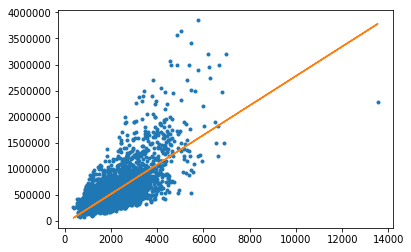

In [143]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],simple_model.predict(x_test),'-')

Above:  blue dots are original data, green line is the prediction from the simple regression.

Below: we can view the learned regression coefficients. 

In [144]:
# The coefficients of sqt model
print('Coefficients: \n', simple_model.coef_)

Coefficients: 
 [[ 282.96321891]]


#Explore other features in the data

To build a more elaborate model, we will explore using more features.

In [145]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [146]:
sales[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,3,1.00,1180,5650,1.0,98178
1,3,2.25,2570,7242,2.0,98125
2,2,1.00,770,10000,1.0,98028
3,4,3.00,1960,5000,1.0,98136
4,3,2.00,1680,8080,1.0,98074
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,98103
21609,4,2.50,2310,5813,2.0,98146
21610,2,0.75,1020,1350,2.0,98144
21611,3,2.50,1600,2388,2.0,98027


Pull the bar at the bottom to view more of the data.  

98039 is the most expensive zip code.

#Build a regression model with more features

In [147]:
x_train_my_features = train_data[my_features]
y_train_my_features = train_data['price']

In [148]:
my_features_model = linear_model.LinearRegression().fit(x_train_my_features, y_train_my_features)

In [149]:
x_test_my_features = test_data[my_features]
y_test_my_features = test_data['price']

In [150]:
y_my_feature_prd = my_features_model.predict(x_test_my_features)

In [184]:
# advanced features
x_train_adv_features = train_data[advanced_features]
y_train_adv_features = train_data['price']
x_test_adv_features = test_data[advanced_features]
y_test_adv_features = test_data['price']
adv_features_model = linear_model.LinearRegression().fit(x_train_adv_features, y_train_adv_features)

In [185]:
y_adv_feature_prd = adv_features_model.predict(x_test_adv_features)

##Comparing the results of the simple model with adding more features

In [186]:
print("RMSE of simple model: %.2f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE of my feature model: %.2f"
      % math.sqrt(mean_squared_error(y_test_my_features, y_my_feature_prd)))
print("RMSE of advanced feature model: %.2f"
      % math.sqrt(mean_squared_error(y_test_adv_features, y_adv_feature_prd)))

RMSE of simple model: 256602.28
RMSE of my feature model: 251700.35
RMSE of advanced feature model: 195458.23


In [187]:
251700.35-195458.23

56242.119999999995

The RMSE goes down from \$255,170 to \$179,508 with more features.

#Apply learned models to predict prices of 3 houses

The first house we will use is considered an "average" house in Seattle. 

In [152]:
house1 = sales[sales['id']==5309101200]

In [153]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


<img src="http://info.kingcounty.gov/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [154]:
print (house1['price'])

1054    620000
Name: price, dtype: int64


In [155]:
house1['sqft_living']

1054    2400
Name: sqft_living, dtype: int64

In [156]:
house1['sqft_living'].shape

(1,)

In [157]:
house1['sqft_living'].values.reshape(-1,1).shape

(1, 1)

In [158]:
y_pred_house1 = simple_model.predict(house1['sqft_living'].values.reshape(-1,1))

In [159]:
print (y_pred_house1)

[[ 629814.10912089]]


In [160]:
print (my_features_model.predict(house1[my_features]))

[ 630943.44776491]


In this case, the model with more features provides a worse prediction than the simpler model with only 1 feature.  However, on average, the model with more features is better.

##Prediction for a second, fancier house

We will now examine the predictions for a fancier house.

In [161]:
house2 = sales[sales['id']==1925069082]

In [162]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [164]:
print (simple_model.predict(house2['sqft_living'].values.reshape(-1,1)))

[[ 1263651.71947217]]


In [165]:
print (my_features_model.predict(house2[my_features]))

[ 1266055.1867014]


In this case, the model with more features provides a better prediction.  This behavior is expected here, because this house is more differentiated by features that go beyond its square feet of living space, especially the fact that it's a waterfront house. 

##Last house, super fancy

Our last house is a very large one owned by a famous Seattleite.

In [166]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [179]:
bill_gates_df = pd.DataFrame(bill_gates)
bill_gates_df[my_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
0,8,25,50000,225000,4,98039


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Bill_gates%27_house.jpg/2560px-Bill_gates%27_house.jpg">

In [181]:
print (my_features_model.predict(bill_gates_df[my_features]))

[ 15774895.35872695]


The model predicts a price of over $13M for this house! But we expect the house to cost much more.  (There are very few samples in the dataset of houses that are this fancy, so we don't expect the model to capture a perfect prediction here.)